In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import scipy.io
import glob
from scipy.interpolate import interp1d
import lmfit as lm
#import seaborn as sns

In [2]:
lvl_list = glob.glob("Cravings20Puff/*_lvl.*")
time_list = glob.glob("Cravings20Puff/*_time.*")
session_list = [file.split('/')[-1].split(".")[0].split("_")[0] for file in lvl_list]
session_list

['10-Session-002',
 '15-Session-002',
 '17-Session-002',
 '19-Session-002',
 '21-Session-002',
 '23-Session-001',
 '24-Session-001',
 '25-Session-001',
 '26-Session-002',
 '28-Session-001',
 '29-Session-001',
 '3-Session-004',
 '5-Session-002',
 '7-Session-002',
 '9-Session-002']

In [3]:
puffs = np.arange(110,2500,120)
puffs.size

20

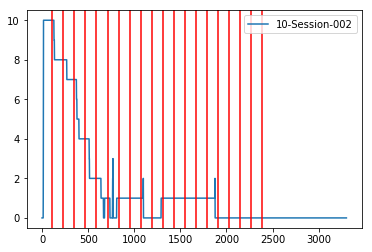

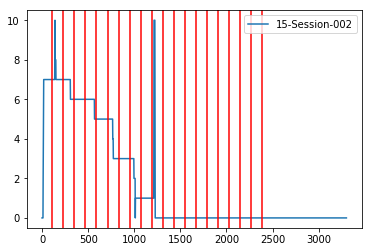

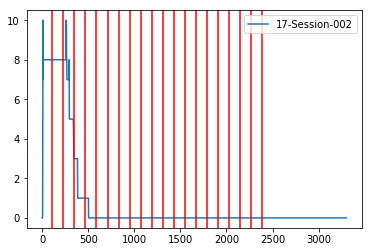

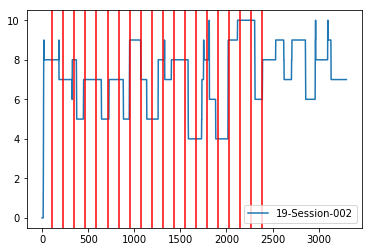

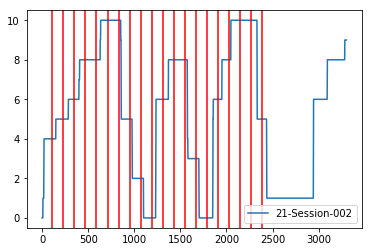

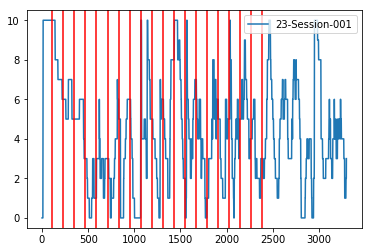

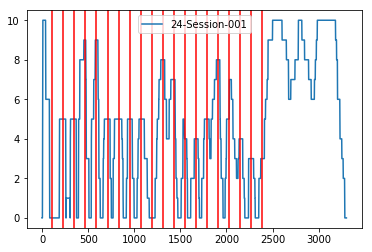

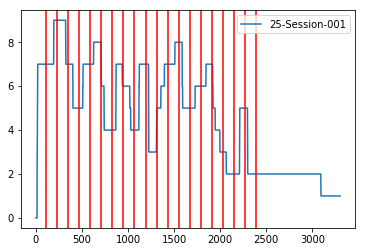

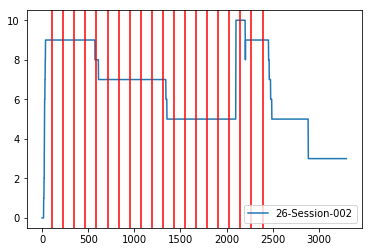

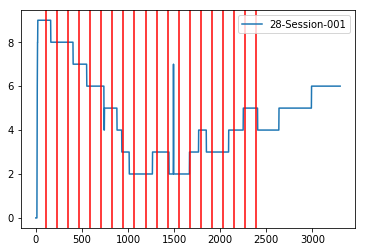

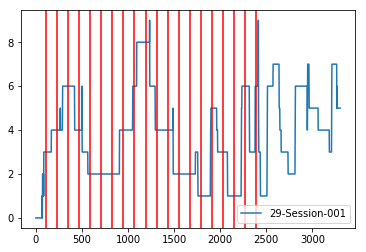

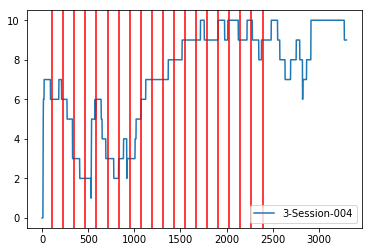

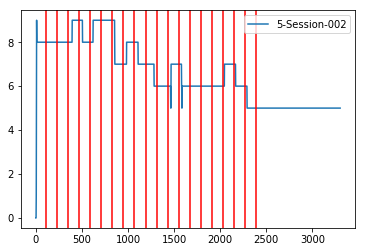

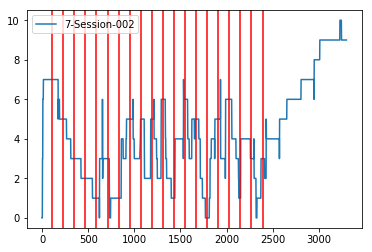

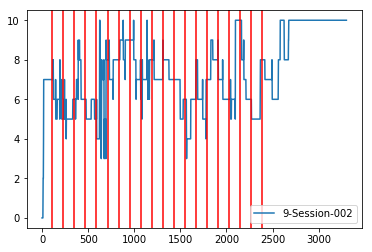

In [4]:
cravings_all = None
cravings_t_all = np.linspace(110,2510,240,endpoint=True)
for lvl,time,session in zip(lvl_list,time_list,session_list):
    cravings = np.load(lvl)
    cravings_t = np.load(time)
    if cravings_all is None:
        cravings_all = interp1d(cravings_t,cravings)(cravings_t_all)
    else:
        cravings_all = np.vstack((cravings_all,interp1d(cravings_t,cravings)(cravings_t_all)))       
    plt.figure()
    plt.plot(cravings_t,cravings,label=session)
    for p in puffs:
        plt.axvline(x=p,color="r")
    plt.legend()


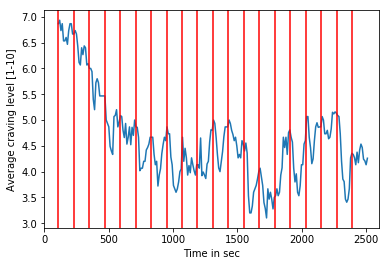

In [5]:
plt.plot(cravings_t_all,np.mean(cravings_all,axis=0))
for p in puffs:
    plt.axvline(x=p,color="r")
plt.xlim((0,2600))
plt.xlabel("Time in sec")
plt.ylabel("Average craving level [1-10]")
plt.savefig("cravings.pdf")

In [6]:
cravings_mean = np.mean(cravings_all,axis=0)

In [16]:
def expon(t,offset,amplitude,tau):
    return offset+amplitude*np.exp(-t/tau)

In [17]:
expon_model = lm.Model(expon)
pars = expon_model.make_params()

In [18]:
pars['offset'].set(value=4.0,vary=True)
pars['amplitude'].set(value=3,vary=True)
pars['tau'].set(value=300,vary=True)

In [19]:
out = expon_model.fit(cravings_all, pars, t=cravings_t_all-110)
print(out.fit_report(min_correl=0.25))

[[Model]]
    Model(expon)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 17
    # data points      = 3600
    # variables        = 3
    chi-square         = 30849.6044
    reduced chi-square = 8.57648162
    Akaike info crit   = 7739.48429
    Bayesian info crit = 7758.05036
[[Variables]]
    offset:     4.20993368 +/- 0.06976754 (1.66%) (init = 4)
    amplitude:  3.19631403 +/- 0.26371423 (8.25%) (init = 3)
    tau:        309.134565 +/- 45.2959112 (14.65%) (init = 300)
[[Correlations]] (unreported correlations are < 0.250)
    C(offset, tau)    = -0.584
    C(amplitude, tau) = -0.553



In [14]:
cravings_mean, cravings_t_all

(array([6.86666667, 6.93333333, 6.73333333, 6.86666667, 6.53333333,
        6.53333333, 6.6       , 6.46666667, 6.73333333, 6.86666667,
        6.86512108, 6.66666667, 6.66666667, 6.73333333, 6.66666667,
        6.43019207, 6.11627873, 6.06666667, 6.4       , 6.26666667,
        6.4361148 , 6.4       , 6.06666667, 6.09251633, 6.        ,
        6.        , 5.9379761 , 5.4       , 5.2005475 , 5.72104013,
        5.8       , 5.72231343, 5.46666667, 5.46666667, 5.46707833,
        5.46666667, 5.46666667, 5.        , 4.93333333, 4.86847593,
        4.49102566, 4.4       , 4.33333333, 5.06666667, 5.08973797,
        5.2       , 4.86666667, 4.96108178, 5.08590395, 5.06666667,
        4.8       , 4.66033509, 4.93333333, 4.53332099, 4.66666667,
        4.86666667, 4.52150152, 4.85866675, 4.70224694, 5.        ,
        4.86666667, 4.85859707, 4.66666667, 4.01766403, 4.06666667,
        4.06666667, 4.2       , 4.2       , 4.4187882 , 4.46666667,
        4.53333333, 4.66666667, 4.66666667, 4.66

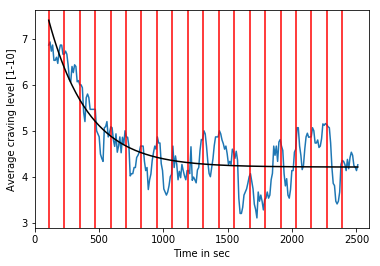

In [21]:
plt.plot(cravings_t_all,np.mean(cravings_all,axis=0))
for p in puffs:
    plt.axvline(x=p,color="r")
plt.xlim((0,2600))
plt.xlabel("Time in sec")
plt.ylabel("Average craving level [1-10]")
plt.plot(cravings_t_all, out.best_fit, 'k-')
plt.savefig("cravings_fit.pdf")